In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Understanding and Preprocessing

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.shape

(6819, 96)

In [5]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [9]:
# Rename the columns

new_column_names = {
    'Bankrupt?': 'Bankrupt',
    ' ROA(C) before interest and depreciation before interest': 'ROA(C)',
    ' ROA(A) before interest and % after tax': 'ROA(A)',
    ' ROA(B) before interest and depreciation after tax': 'ROA(B)',
    ' Net Value Per Share (B)': 'NVPS(B)',
    ' Net Value Per Share (A)': 'NVPS(A)',
    ' Net Value Per Share (C)': 'NVPS(C)',
    ' Persistent EPS in the Last Four Seasons':'EPS_LAST_FOUR_SEASON',
    ' Per Share Net profit before tax (Yuan ¥)':'PSNP_BTAX',
    ' Debt ratio %': 'Debt_Ratio',
    ' Net worth/Assets': 'Net_Worth/Assets',
    ' Borrowing dependency':'B_D',
    ' Net profit before tax/Paid-in capital': 'Net_Profit_before_Tax/Paid-in_Capital',
    ' Working Capital to Total Assets': 'Working_Capital/Total_Assets',
    ' Current Liability to Assets': 'Current_Liability/Assets',
    ' Current Liabilities/Equity': 'Current_Liabilities/Equity',
    ' Retained Earnings to Total Assets': 'Retained_Earnings/Total_Assets',
    ' Current Liability to Equity':'Current_Liability_to_Equity',
    ' Current Liability to Current Assets':'Current_Liability_to_Current_Assets',
    ' Net Income to Total Assets': 'Net_Income_to_Total_Assets',
    ' Net Income to Stockholder\'s Equity' : 'Net_Income_Stockholder\'s_Equity',
    ' Liability to Equity' : 'Liability_to_Equity'
}

df.rename(columns=new_column_names, inplace=True)

In [10]:
df.corr()

,Bankrupt,ROA(C),ROA(A),ROA(B),Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),NVPS(B),NVPS(A),NVPS(C),EPS_LAST_FOUR_SEASON,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),PSNP_BTAX,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt_Ratio,Net_Worth/Assets,Long-term fund suitability ratio (A),B_D,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net_Profit_before_Tax/Paid-in_Capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working_Capital/Total_Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current_Liability/Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current_Liabilities/Equity,Long-term Liability to Current Assets,Retained_Earnings/Total_Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current_Liability_to_Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current_Liability_to_Current_Assets,Liability-Assets Flag,Net_Income_to_Total_Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net_Income_Stockholder's_Equity,Liability_to_Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,-0.008395,-0.006083,-0.024232,-0.072356,-0.023063,-0.109706,-0.165399,-0.165465,-0.164784,-0.219560,-0.077516,-0.004692,-0.142051,-0.201395,-0.000458,-0.015168,-0.037783,-0.036820,-0.009401,-0.044431,0.065329,-0.016858,-0.051345,-0.002211,0.025058,-0.002681,0.012314,0.250161,-0.250161,0.016920,0.176543,0.070455,-0.141111,-0.207857,0.075278,-0.067915,-0.004754,-0.006556,-0.001376,0.072818,0.021089,0.039718,-0.092842,0.002829,-0.193083,-0.086382,-0.044823,-0.100130,-0.003823,0.077921,0.194494,-0.077082,-0.001906,0.000822,-0.020809,-0.147221,0.153828,0.000778,-0.217779,-0.007137,0.139049,0.011929,0.025814,-0.002894,-0.018035,0.000479,0.066328,-0.020809,0.153828,0.139014,-0.070456,-0.043125,-0.115383,-0.058563,0.171306,0.139212,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C),-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.505407,0.505281,0.775006,0.379839,-0.015932,0.687201,0.750564,0.000591,0.036511,0.115083,0.115040,0.025234,0.019635,-0.021930,0.079906,0.296158,0.013196,-0.026336,0.003988,-0.022208,-0.261427,0.261427,0.002967,-0.161671,-0.035729,0.685028,0.753339,-0.109888,0.210622,-0.033947,0.007019,-0.062660,-0.065919,0.022896,-0.014834,0.301996,-0.012543,0.259680,0.181993,0.098820,0.235314,-0.010530,-0.046009,-0.210256,0.388151,-0.004447,0.013330,0.052783,0.103819,-0.142734,0.021508,0.650217,0.02345

# Feature Engineering and Feature Selection
- Using Recursive feature elimination

In [11]:
x = df.drop(['Bankrupt'], axis=1)

In [12]:
y = df['Bankrupt']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
logreg = LogisticRegression(solver='liblinear', random_state=42)

In [15]:
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=42, solver='liblinear'),
    n_features_to_select=15)

In [16]:
selected_features = rfe.support_
print("Selected Features:", selected_features)
print("Feature Ranking:", rfe.ranking_)

Selected Features: [False False False False False False False False False False  True  True
 False  True False False False False False False  True False False False
 False False False False  True False False False False False False False
 False False False False False False False False False  True  True  True
 False False  True False  True False False False False  True  True False
 False False  True False False False False False False False False False
 False  True False False False False False False False False False False
 False False  True False False False False False False False False]
Feature Ranking: [36 26 28 32 34 10 20 17 51 21  1  1 41  1 64 60 58 59 54 47  1 66 57 75
 16 24 25 62  1  2 55 44 72  6 30  4 73 11 77 46 79 67 61 43 63  1  1  1
  8 70  1 42  1 13 38 29 52  1  1 71 45 53  1 18 22 50  3 12 80 78  5  7
 37  1 27 65 19 49 68 23 40 35 48 81 76 14  1 31 33 15 56 74 39  9 69]


In [17]:
data = x.columns

In [18]:
selected_features

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [19]:
selected_features_names = data[selected_features]

In [20]:
selected_features_names.shape

(15,)

In [21]:
new_df = df[selected_features_names]

In [22]:
new_df.head()

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Cash Turnover Rate,Total assets to GNP price
0,1.256969e-04,0.0,0.000725,0.017560,4.980000e+09,0.001814,0.003487,1.820926e-04,0.034164,0.037135,0.001997,1.473360e-04,0.001036,4.580000e+08,0.009219
1,2.897851e-04,0.0,0.000647,0.021144,6.110000e+09,0.001286,0.004917,9.360000e+09,0.006889,0.012335,0.004136,1.383910e-03,0.005210,2.490000e+09,0.008323
2,2.361297e-04,25500000.0,0.000790,0.005944,7.280000e+09,0.001495,0.004227,6.500000e+07,0.028997,0.141016,0.006302,5.340000e+09,0.013879,7.610000e+08,0.040003
3,1.078888e-04,0.0,0.000449,0.014368,4.880000e+09,0.001966,0.003215,7.130000e+09,0.015463,0.021320,0.002961,1.010646e-03,0.003540,2.030000e+09,0.003252
4,7.890000e+09,0.0,0.000686,0.029690,5.510000e+09,0.001449,0.004367,1.633674e-04,0.058111,0.023988,0.004275,6.804636e-04,0.004869,8.240000e+08,0.003878


In [23]:
new_df.shape

(6819, 15)

In [24]:
final_df = pd.concat([new_df,y], axis=1)

In [25]:
final_df.head()

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Cash Turnover Rate,Total assets to GNP price,Bankrupt
0,1.256969e-04,0.0,0.000725,0.017560,4.980000e+09,0.001814,0.003487,1.820926e-04,0.034164,0.037135,0.001997,1.473360e-04,0.001036,4.580000e+08,0.009219,1
1,2.897851e-04,0.0,0.000647,0.021144,6.110000e+09,0.001286,0.004917,9.360000e+09,0.006889,0.012335,0.004136,1.383910e-03,0.005210,2.490000e+09,0.008323,1
2,2.361297e-04,25500000.0,0.000790,0.005944,7.280000e+09,0.001495,0.004227,6.500000e+07,0.028997,0.141016,0.006302,5.340000e+09,0.013879,7.610000e+08,0.040003,1
3,1.078888e-04,0.0,0.000449,0.014368,4.880000e+09,0.001966,0.003215,7.130000e+09,0.015463,0.021320,0.002961,1.010646e-03,0.003540,2.030000e+09,0.003252,1
4,7.890000e+09,0.0,0.000686,0.029690,5.510000e+09,0.001449,0.004367,1.633674e-04,0.058111,0.023988,0.004275,6.804636e-04,0.004869,8.240000e+08,0.003878,1


In [26]:
final_df.shape

(6819, 16)

# Exploratory Data Analysis (EDA)

<Axes: >

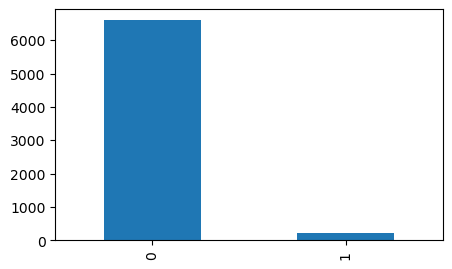

In [27]:
final_df.Bankrupt.value_counts().plot(kind='bar', figsize=(5,3))

In [28]:
final_df.corr()

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Cash Turnover Rate,Total assets to GNP price,Bankrupt
Operating Expense Rate,1.000000,-0.060386,-0.006011,-0.015838,0.014168,-0.028331,-0.007935,-0.129214,-0.010492,-0.009231,-0.012904,0.024258,-0.011448,0.040730,-0.025524,-0.006083
Research and development expense rate,-0.060386,1.000000,0.000656,-0.019291,0.023189,-0.034508,-0.028471,0.001366,-0.012780,-0.028073,-0.015717,-0.042133,-0.023691,0.070369,-0.020166,-0.024232
Interest-bearing debt interest rate,-0.006011,0.000656,1.000000,-0.003904,-0.018700,-0.006983,0.016496,0.007713,-0.002586,0.024254,0.055143,-0.011063,0.011240,-0.019243,-0.007519,-0.023063
Revenue Per Share (Yuan ¥),-0.015838,-0.019291,-0.003904,1.000000,-0.010670,0.264346,-0.000985,-0.011734,0.275742,-0.000982,-0.000538,-0.001871,0.037494,-0.021618,-0.001272,-0.004692
Total Asset Growth Rate,0.014168,0.023189,-0.018700,-0.010670,1.000000,-0.030866,-0.035608,0.030277,-0.017423,-0.010750,-0.002528,0.006808,-0.011164,0.064419,-0.038909,-0.044431
Accounts Receivable Turnover,-0.028331,-0.034508,-0.006983,0.264346,-0.030866,1.000000,-0.001762,-0.013201,0.032398,-0.001757,-0.000962,0.036912,0.048829,-0.022508,0.113731,-0.004754
Average Collection Days,-0.007935,-0.028471,0.016496,-0.000985,-0.035608,-0.001762,1.000000,0.007906,-0.000653,-0.000539,-0.000803,0.018409,-0.003676,0.014979,-0.001897,-0.006556
Inventory Turnover Rate (times),-0.129214,0.001366,0.007713,-0.011734,0.030277,-0.013201,0.007906,1.000000,0.000193,-0.025242,-0.011180,-0.021335,-0.051987,0.017862,0.009172,-0.001376
Revenue per person,-0.010492,-0.012780,-0.002586,0.275742,-0.017423,0.032398,-0.000653,0.000193,1.000000,-0.000651,-0.000356,-0.001240,0.086595,-0.014322,-0.000843,0.039718
Allocation rate per person,-0.009231,-0.028073,0.024254,-0.000982,-0.010750,-0.001757,-0.000539,-0.025242,-0.000651,1.000000,-0.000800,0.004314,-0.003665,0.012579,-0.001892,0.002829


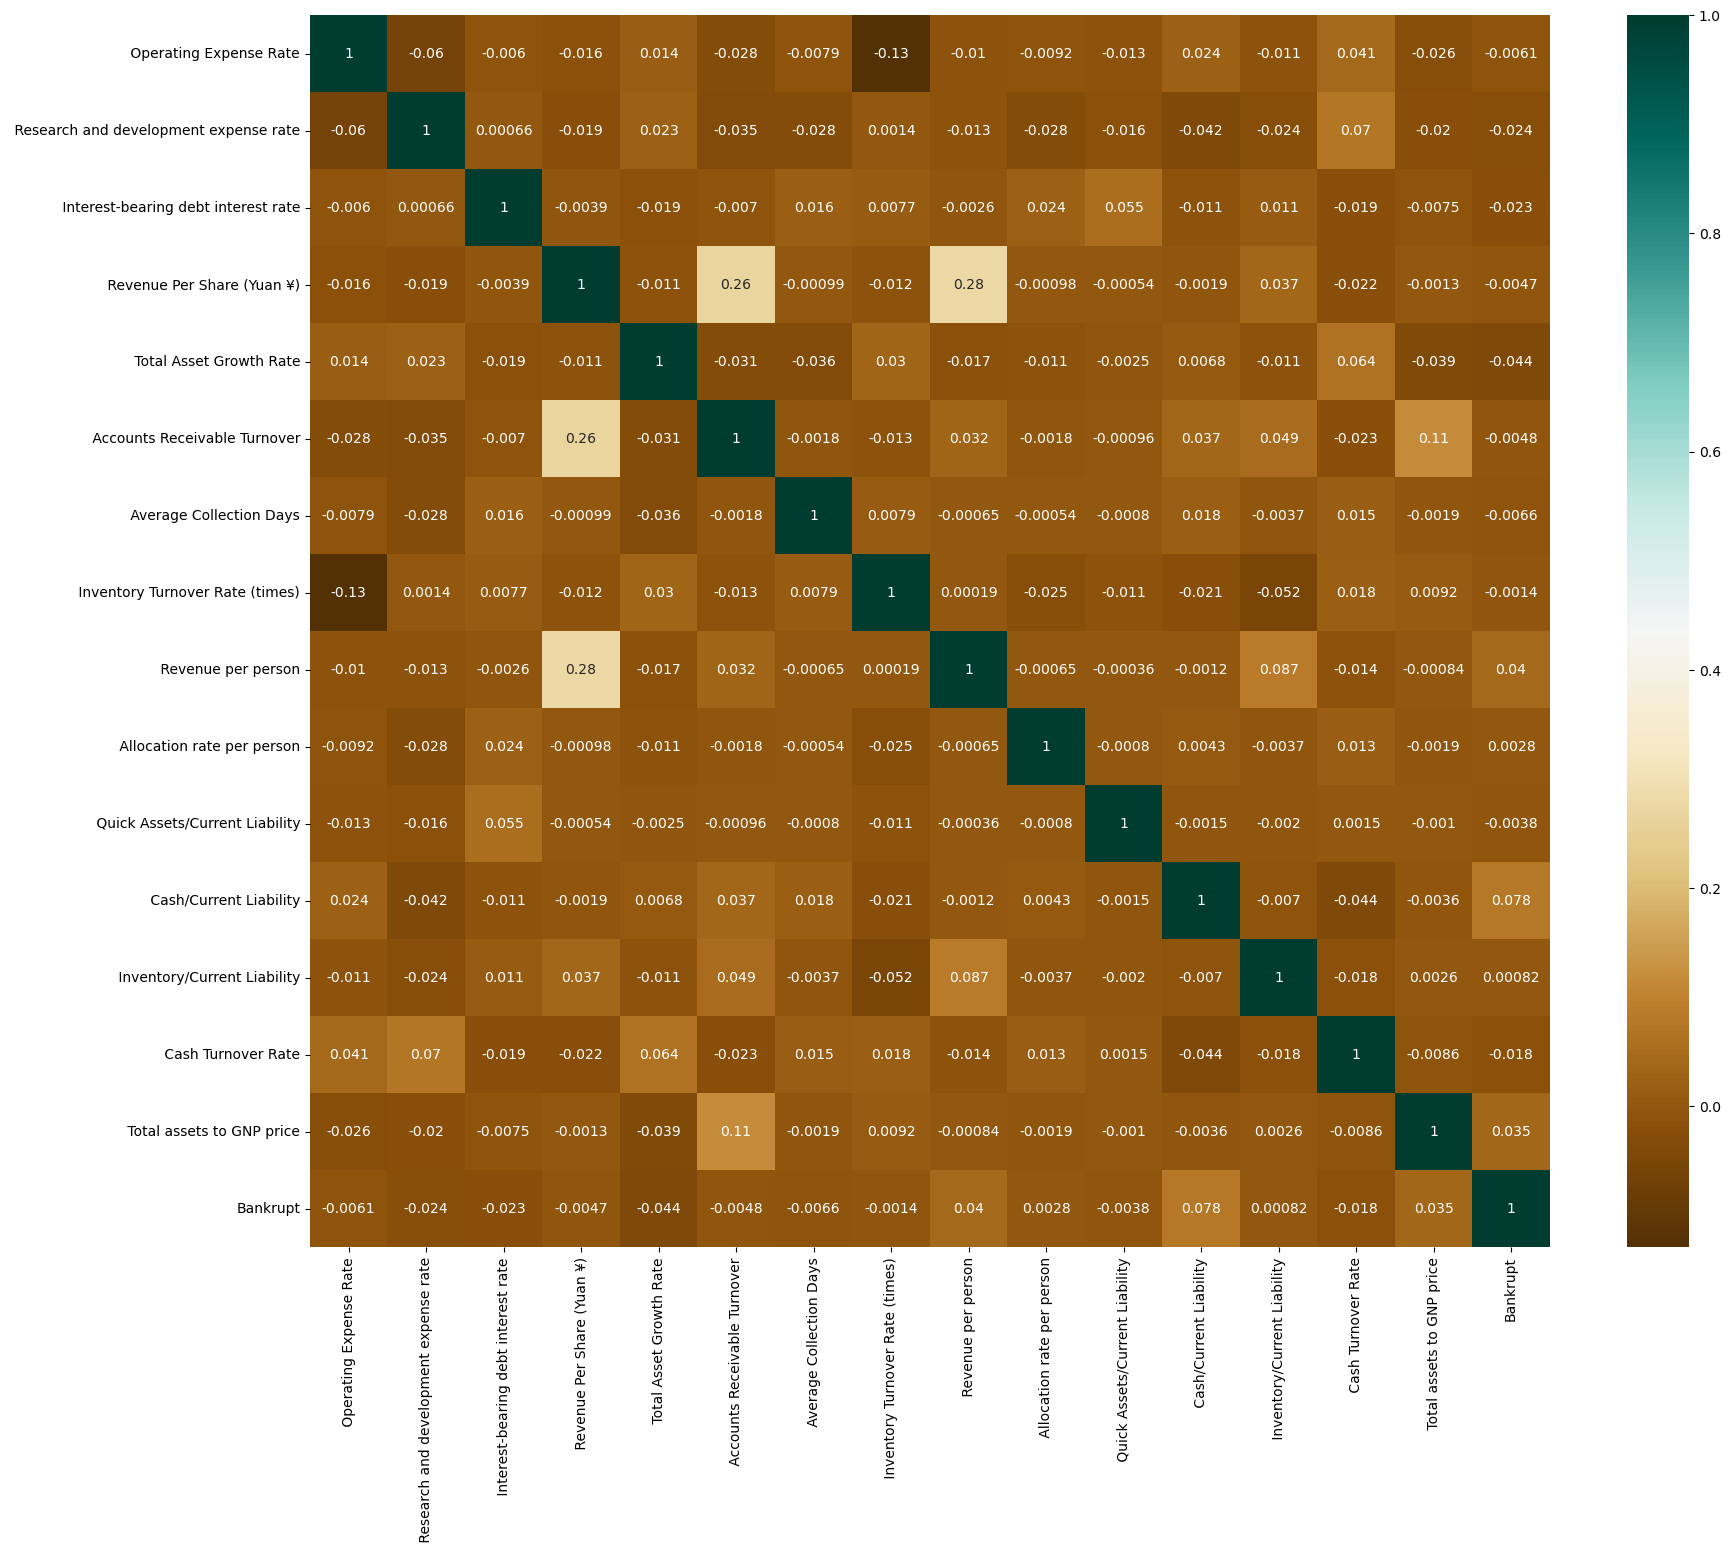

In [29]:
plt.figure(figsize=(20,16))
sns.heatmap(final_df.corr(),cmap="BrBG",annot=True)
plt.show()

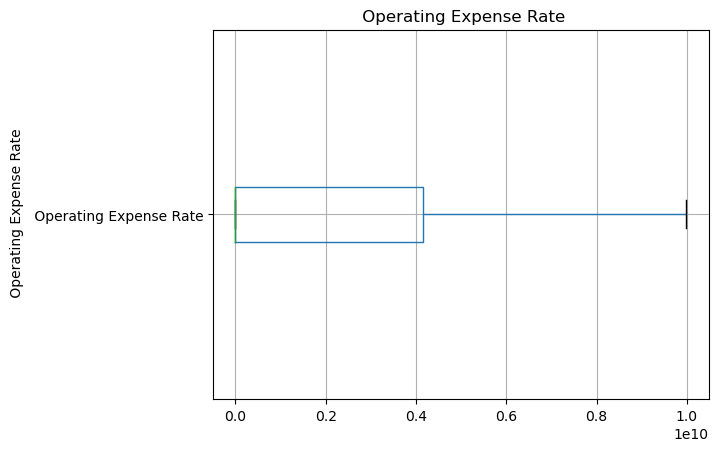

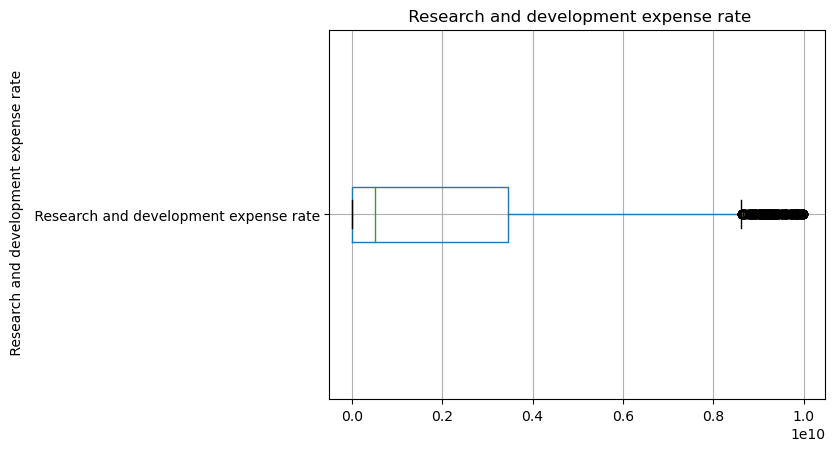

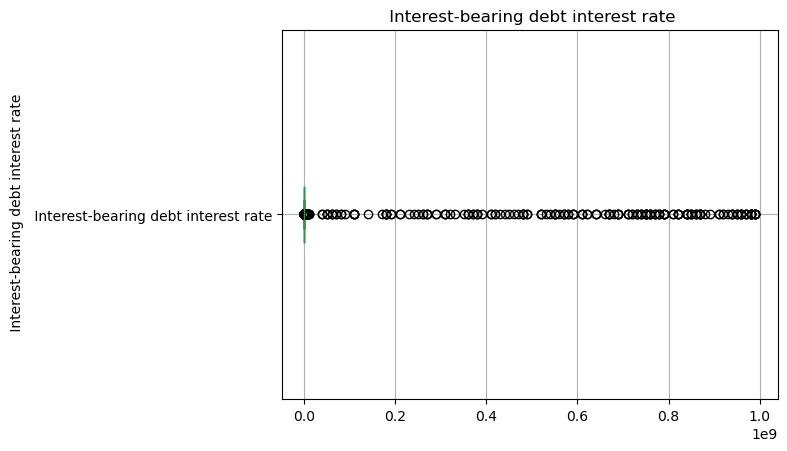

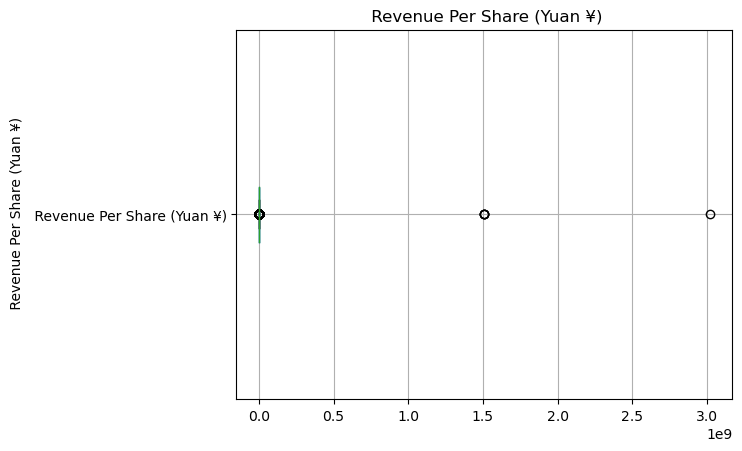

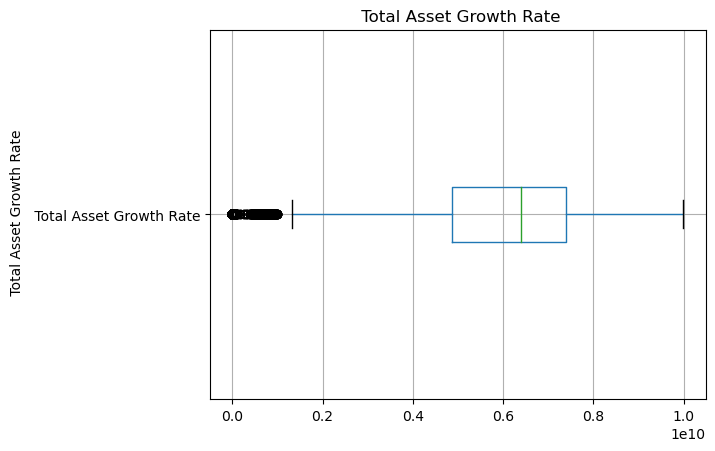

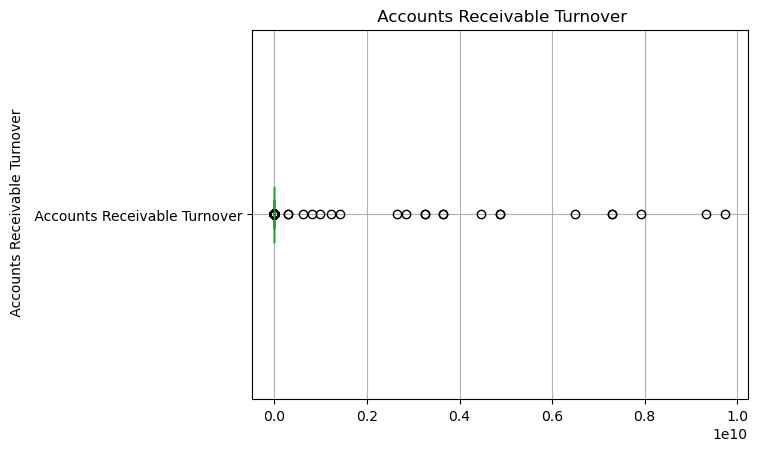

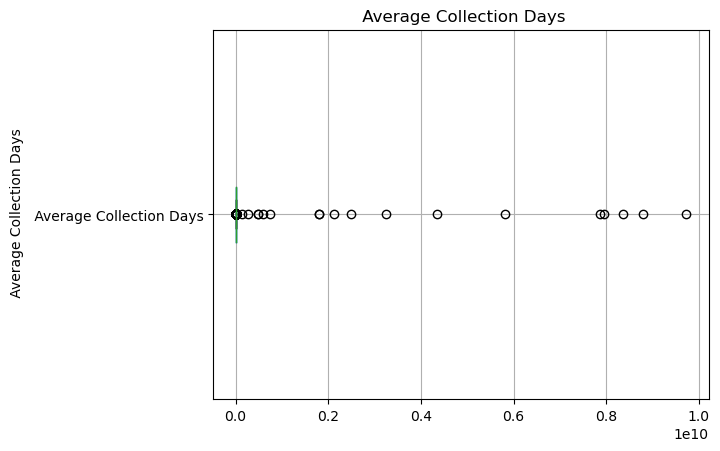

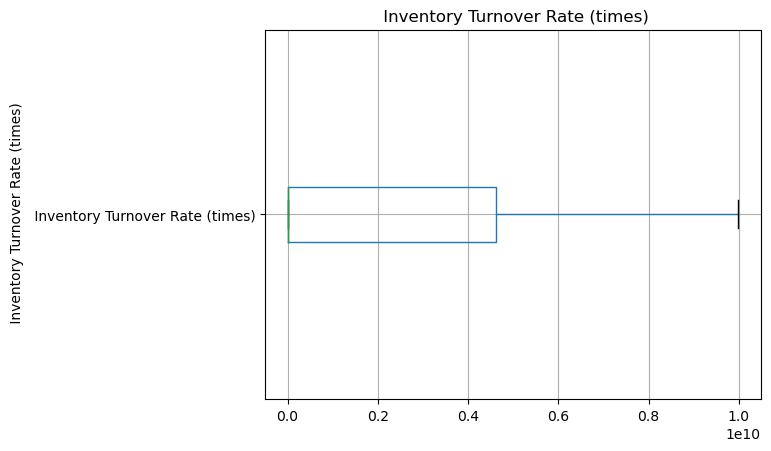

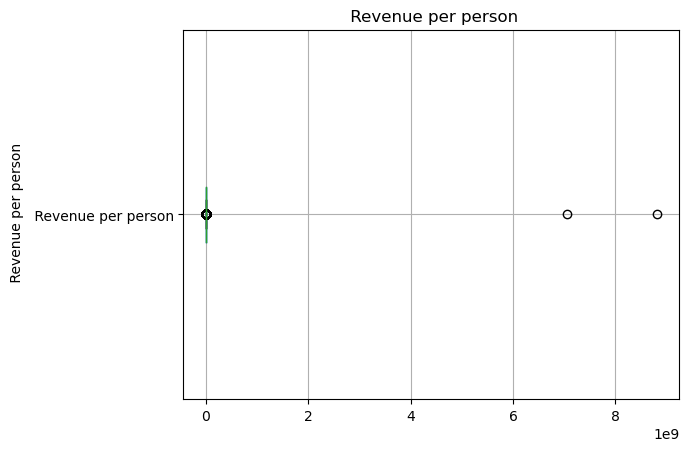

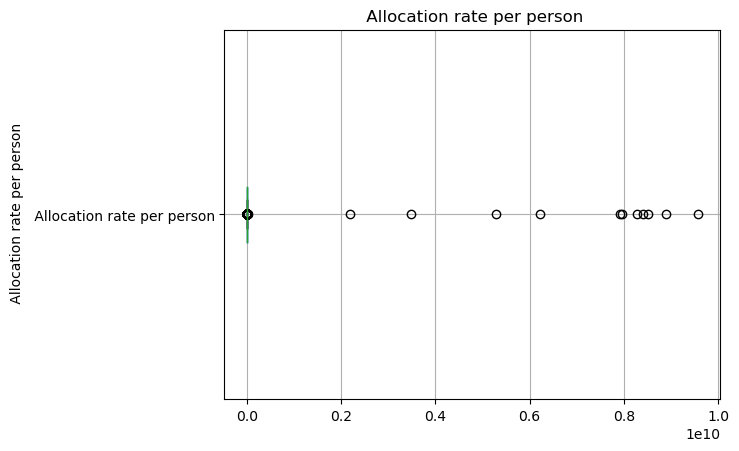

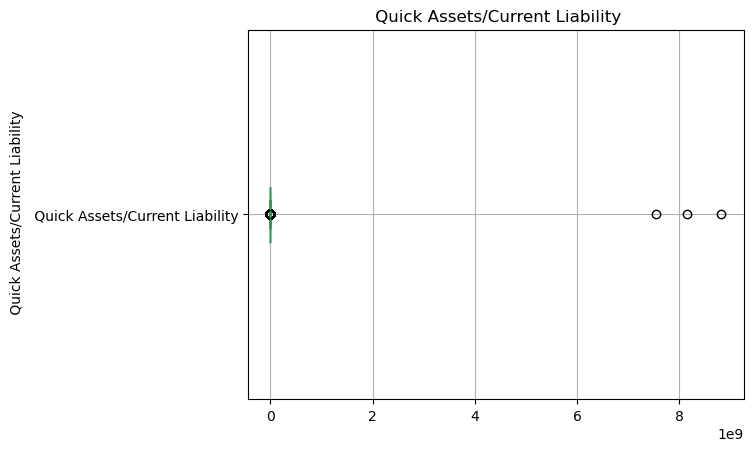

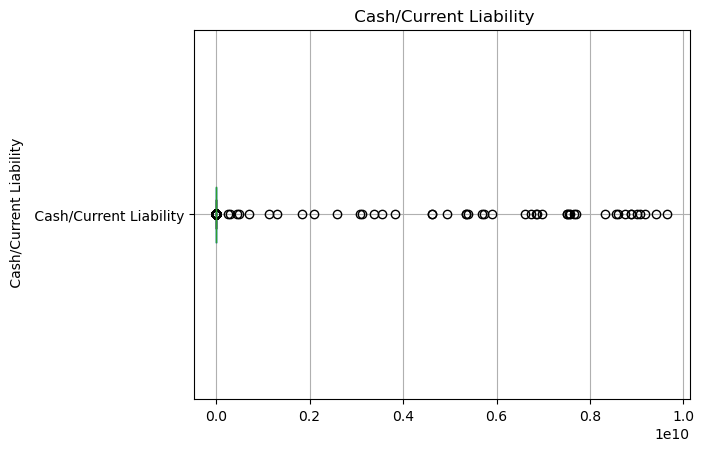

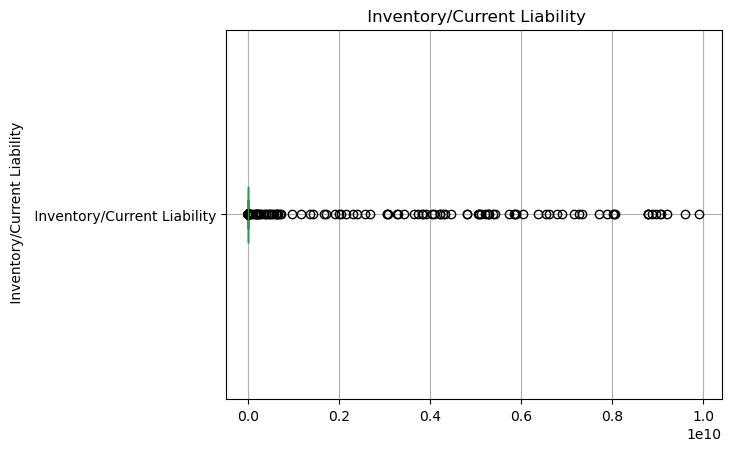

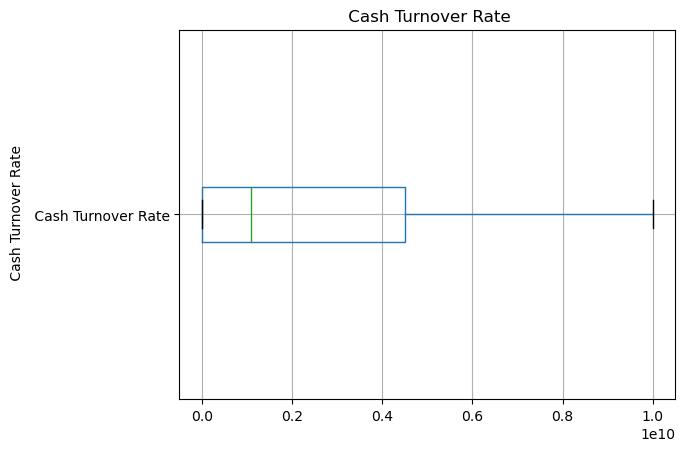

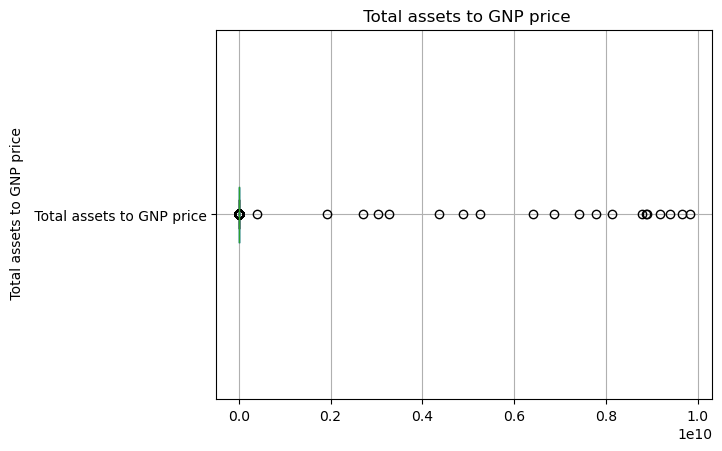

In [30]:
for feature in new_df:
    final_df.boxplot(feature, vert=False)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [31]:
def impute(x):
    Q3=new_df[x].quantile(0.75)
    Q1=new_df[x].quantile(0.25)
    IQR=Q3-Q1
    lb=Q1-2.0*(IQR)
    ub=Q3+2.0*(IQR)
    idx=np.where(new_df[x]>ub)
    final_df[x].iloc[idx]=ub
    idx=np.where(new_df[x]<lb)
    final_df[x].iloc[idx]=lb

In [32]:
for column in final_df:
    if column!='Bankrupt':
        impute(column)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11272\2381982934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[x].iloc[idx]=ub
C:\Users\Dell\AppData\Local\Temp\ipykernel_11272\2381982934.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[x].iloc[idx]=lb
C:\Users\Dell\AppData\Local\Temp\ipykernel_11272\2381982934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[x].iloc[idx]=ub
C:\Users\Dell\AppData\Local

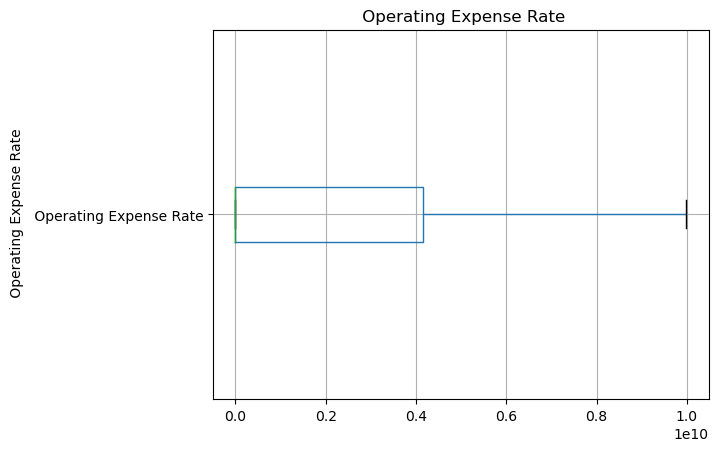

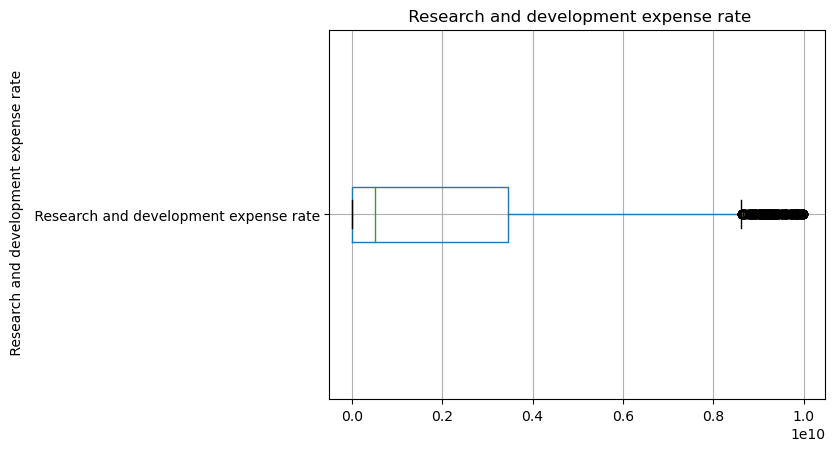

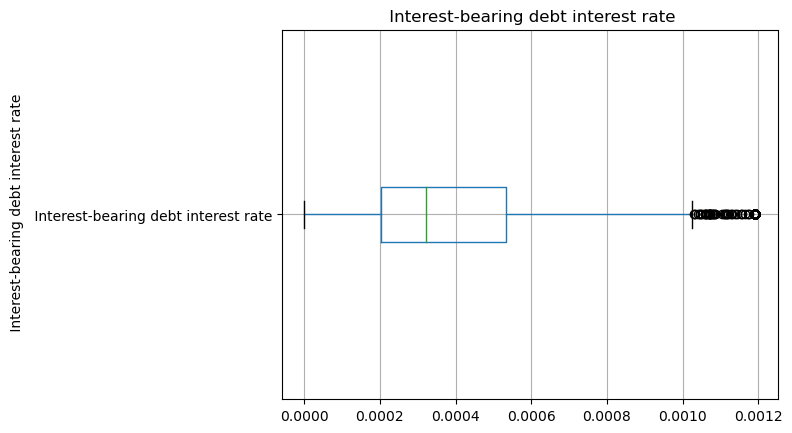

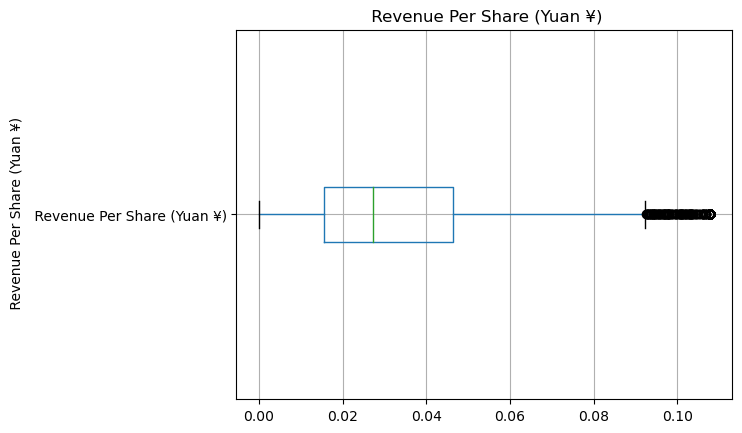

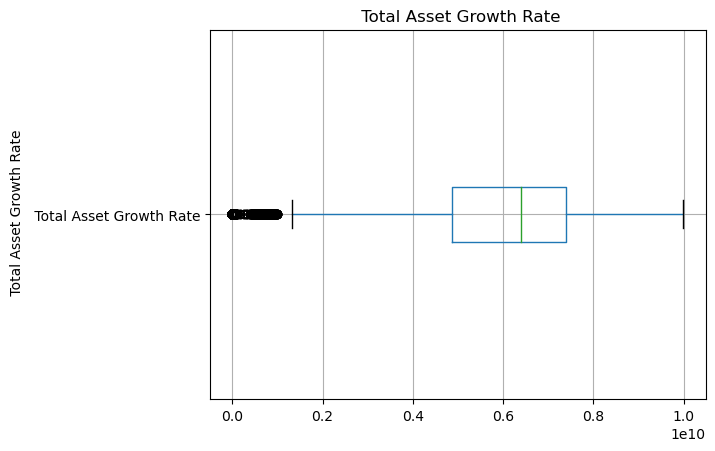

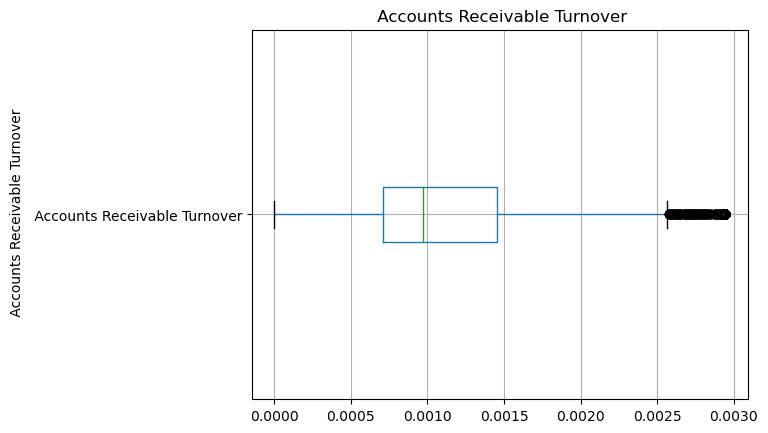

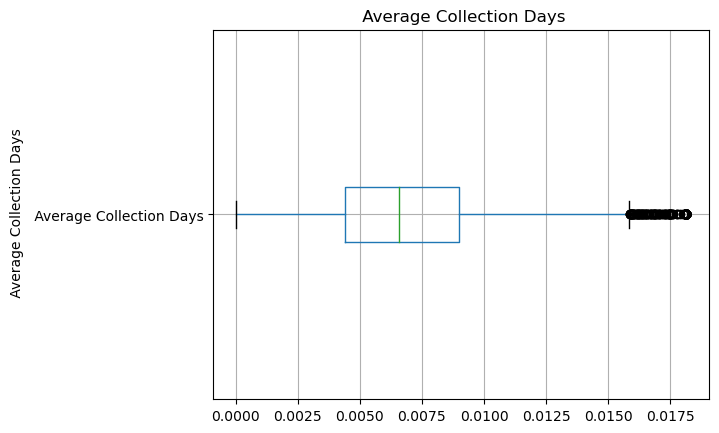

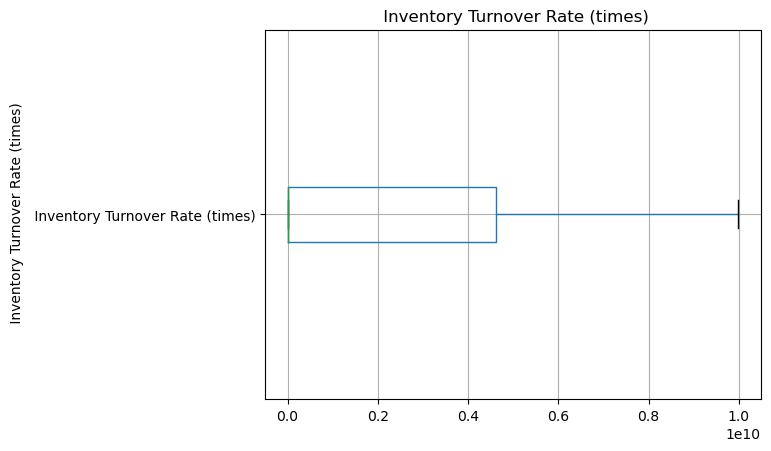

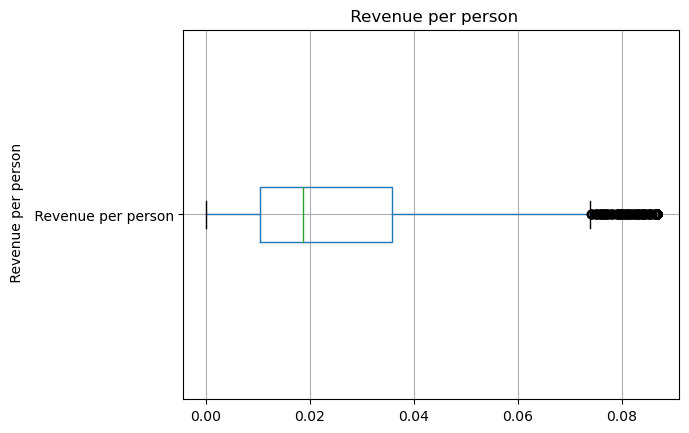

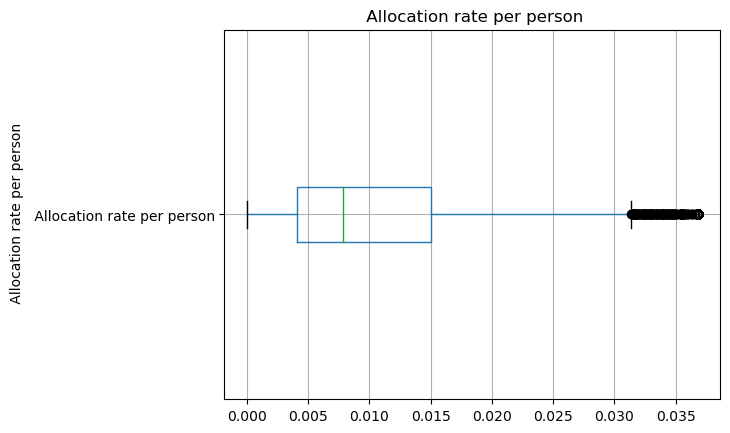

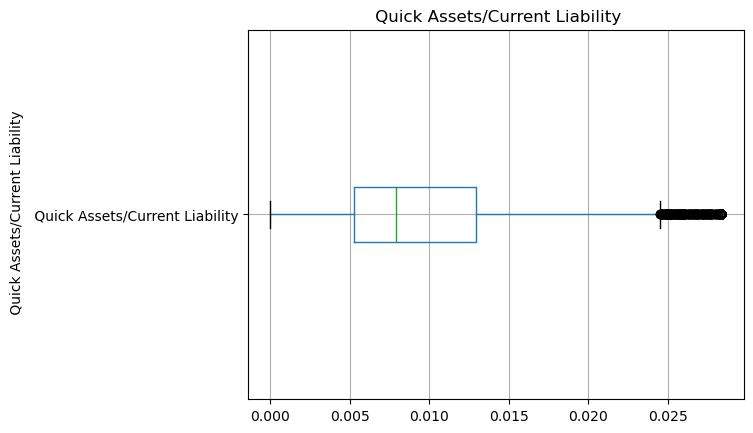

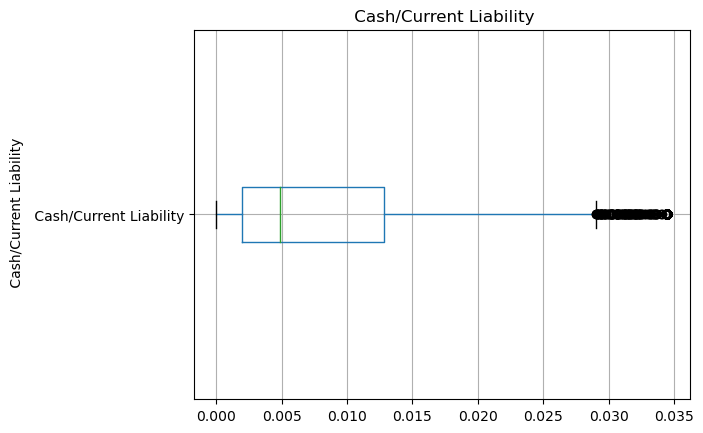

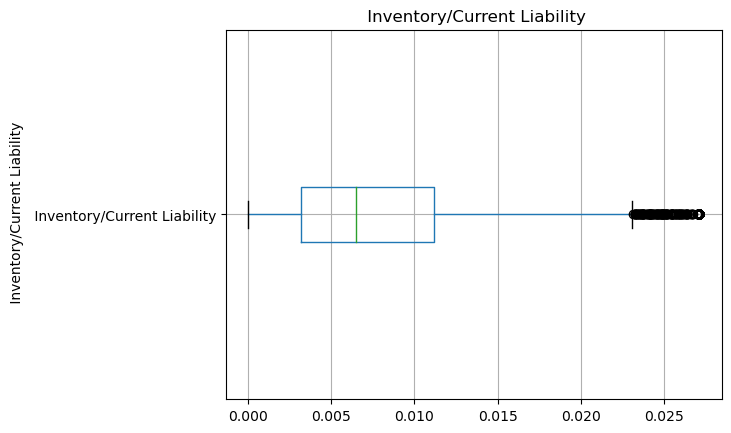

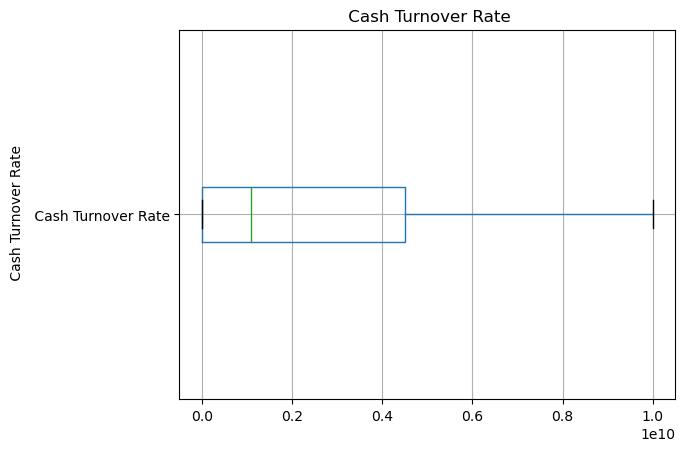

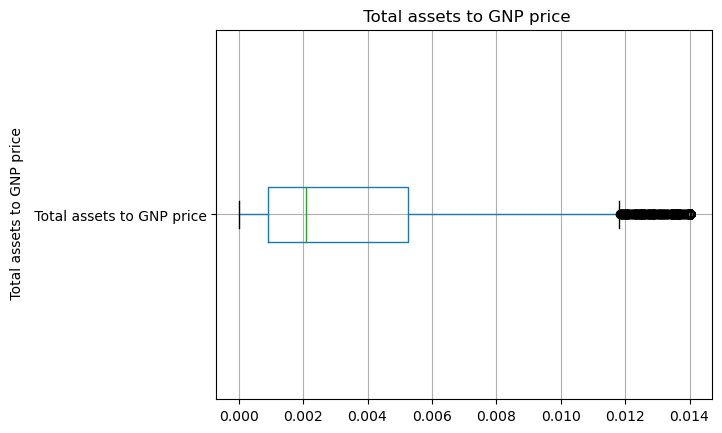

In [33]:
for feature in final_df:
    if feature != 'Bankrupt':
        final_df.boxplot(feature, vert=False)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Hypothesis Testing

In [34]:
# hypothesis testing
significant_features = []
for column in final_df.columns[1:]:  # Exclude the target variable
    t_stat, p_value = stats.ttest_ind(final_df[column][final_df['Bankrupt'] == 1], final_df[column][final_df['Bankrupt'] == 0])
    if p_value < 0.05:
        significant_features.append(column)

# Display significant features
significant_features

C:\Users\Dell\AppData\Local\Temp\ipykernel_11272\3295517449.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(final_df[column][final_df['Bankrupt'] == 1], final_df[column][final_df['Bankrupt'] == 0])


[' Research and development expense rate',
 ' Interest-bearing debt interest rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Total Asset Growth Rate',
 ' Average Collection Days',
 ' Revenue per person',
 ' Allocation rate per person',
 ' Quick Assets/Current Liability',
 ' Cash/Current Liability',
 ' Inventory/Current Liability',
 ' Total assets to GNP price',
 'Bankrupt']

In [35]:
significant_features

[' Research and development expense rate',
 ' Interest-bearing debt interest rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Total Asset Growth Rate',
 ' Average Collection Days',
 ' Revenue per person',
 ' Allocation rate per person',
 ' Quick Assets/Current Liability',
 ' Cash/Current Liability',
 ' Inventory/Current Liability',
 ' Total assets to GNP price',
 'Bankrupt']

In [36]:
len(significant_features)

12

In [37]:
df1 = final_df[significant_features]

In [38]:
df1.head()

,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Average Collection Days,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Total assets to GNP price,Bankrupt
0,0.0,0.000725,0.017560,4.980000e+09,0.003487,0.034164,0.036820,0.001997,0.000147,0.001036,0.009219,1
1,0.0,0.000647,0.021144,6.110000e+09,0.004917,0.006889,0.012335,0.004136,0.001384,0.005210,0.008323,1
2,25500000.0,0.000790,0.005944,7.280000e+09,0.004227,0.028997,0.036820,0.006302,0.034471,0.013879,0.014002,1
3,0.0,0.000449,0.014368,4.880000e+09,0.003215,0.015463,0.021320,0.002961,0.001011,0.003540,0.003252,1
4,0.0,0.000686,0.029690,5.510000e+09,0.004367,0.058111,0.023988,0.004275,0.000680,0.004869,0.003878,1


# Oversampling using SMOTE

In [39]:
X = df1.drop(['Bankrupt'], axis=1)
y = df1['Bankrupt']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [42]:
y_train_resampled.shape

(9262,)

<Axes: >

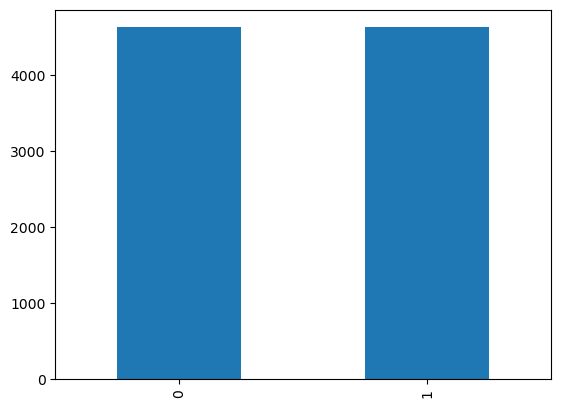

In [43]:
y_train_resampled.value_counts().plot(kind='bar')

# Model Building

# 1. Logistic Regression

In [44]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [45]:
y_pred = logreg.predict(X_test)

In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9618768328445748
Confusion Matrix:
 [[1968    0]
 [  78    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1968
           1       0.00      0.00      0.00        78

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.94      2046



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
#25 : 77, 51, 55
#15 : 88, 50, 51

# 2. Random Forest

In [48]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = rf.predict(X_test)

In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9437927663734116
Confusion Matrix:
 [[1906   62]
 [  53   25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1968
           1       0.29      0.32      0.30        78

    accuracy                           0.94      2046
   macro avg       0.63      0.64      0.64      2046
weighted avg       0.95      0.94      0.95      2046



# 3.XG_Boost

In [51]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)

C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:50:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [52]:
y_pred = xgb.predict(X_test)

In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9369501466275659
Confusion Matrix:
 [[1892   76]
 [  53   25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1968
           1       0.25      0.32      0.28        78

    accuracy                           0.94      2046
   macro avg       0.61      0.64      0.62      2046
weighted avg       0.95      0.94      0.94      2046

